**Aerofit **

---

It is a leading brand in the field of fitness equipment. Aerofit provides a product
range including machines such as treadmills, exercise bikes, gym equipment, and
fitness accessories to cater to the needs of all categories of people.


# Problem Statement

● The market research team at AeroFit wants to identify the characteristics of
the target
audience for each type of treadmill offered by the company, to provide a better
recommendation of the treadmills to new customers. The team decides to investigate
whether there are differences across the product with respect to customer
characteristics.
● Perform descriptive analytics to create a customer profile for each AeroFit treadmill
product by developing appropriate tables and charts.
● Construct two-way contingency tables for each AeroFit treadmill product and compute
all conditional and marginal probabilities and their insights/impact on the business.


## Getting the dataset



In [ ]:
!gdown 1sNXswQ9OoGmzJqpuDGHZt1zcLCRiZLO3
!ls



Downloading...
From: https://drive.google.com/uc?id=1sNXswQ9OoGmzJqpuDGHZt1zcLCRiZLO3
To: /content/aerofit_treadmill.csv
100% 7.28k/7.28k [00:00<00:00, 14.8MB/s]
aerofit_treadmill.csv  sample_data


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('aerofit_treadmill.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47





*  Columns with categorical data are Product,Gender,MaritialStatus
*   Columns with numerical value Age,Education,Usage,Fitness,Income,Miles



In [ ]:
# Lets check the size of df as well

df.shape

(180, 9)

In [ ]:
# Let's Check the Columns null values and datatype

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB




1.   As check the Shape of df which is (180,9) and checking info of columns all columns have 180 non null values which means there is no null values in this df.
2.   Also all the columns datatype are properr.However we can create some new columns as per the requirement




In [ ]:
# Let use df.describe for all the columns
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
df['Product'].value_counts()/df.shape[0]*100

,count
Product,
KP281,44.444444
KP481,33.333333
KP781,22.222222


In [ ]:
df['Gender'].value_counts()/df.shape[0]*100

,count
Gender,
Male,57.777778
Female,42.222222


In [ ]:
df['MaritalStatus'].value_counts()/df.shape[0]*100

,count
MaritalStatus,
Partnered,59.444444
Single,40.555556


*   There are 3 unique products in the dataset(KP281,KP481,KP781)

*   KP281 is the most purchased product
*   Minimum & Maximum age of the person is 18 & 50, mean is 28.79 and 75% of persons have age less than or equal to 33.


*   Most of the people are having 16 years of education i.e., 75% of persons are having
education <= 16 years.

*   Data shows 57.7% male has purchased the product and rest by female.
*   Due to high value of Standard Deviation for income and Miles columns.There is high probability of Outliers.







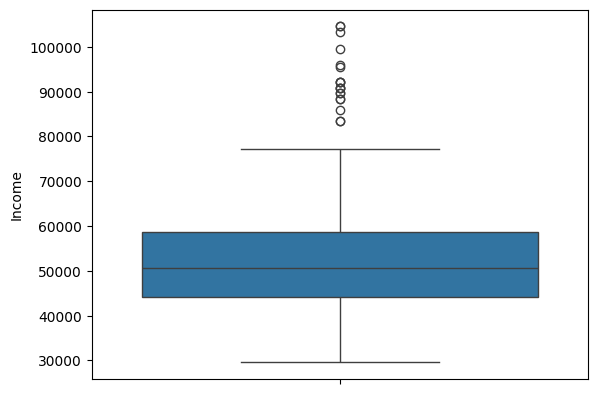

In [ ]:
# Let's Check the Outliers in Income and Miles Column by plotting box plot
sns.boxplot(df['Income'])
plt.show()

<Axes: ylabel='Miles'>

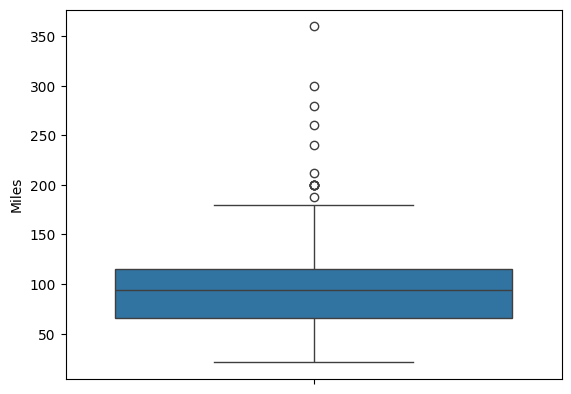

In [ ]:
sns.boxplot(df['Miles'])

In [ ]:
# Let's Remove/clip the data between the 5 percentile and 95 percentile by using
# np.clip()

df['Income']=np.clip(df['Income'],df['Income'].quantile(0.05),df['Income'].quantile(0.95))

In [ ]:
df['Miles']=np.clip(df['Miles'],df['Miles'].quantile(0.05),df['Miles'].quantile(0.95))

In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53477.070000,101.088889
std,6.943498,1.617055,1.084797,0.958869,15463.662523,43.364286
min,18.000000,12.000000,2.000000,1.000000,34053.150000,47.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,90948.250000,200.000000


#Univariate Analysis

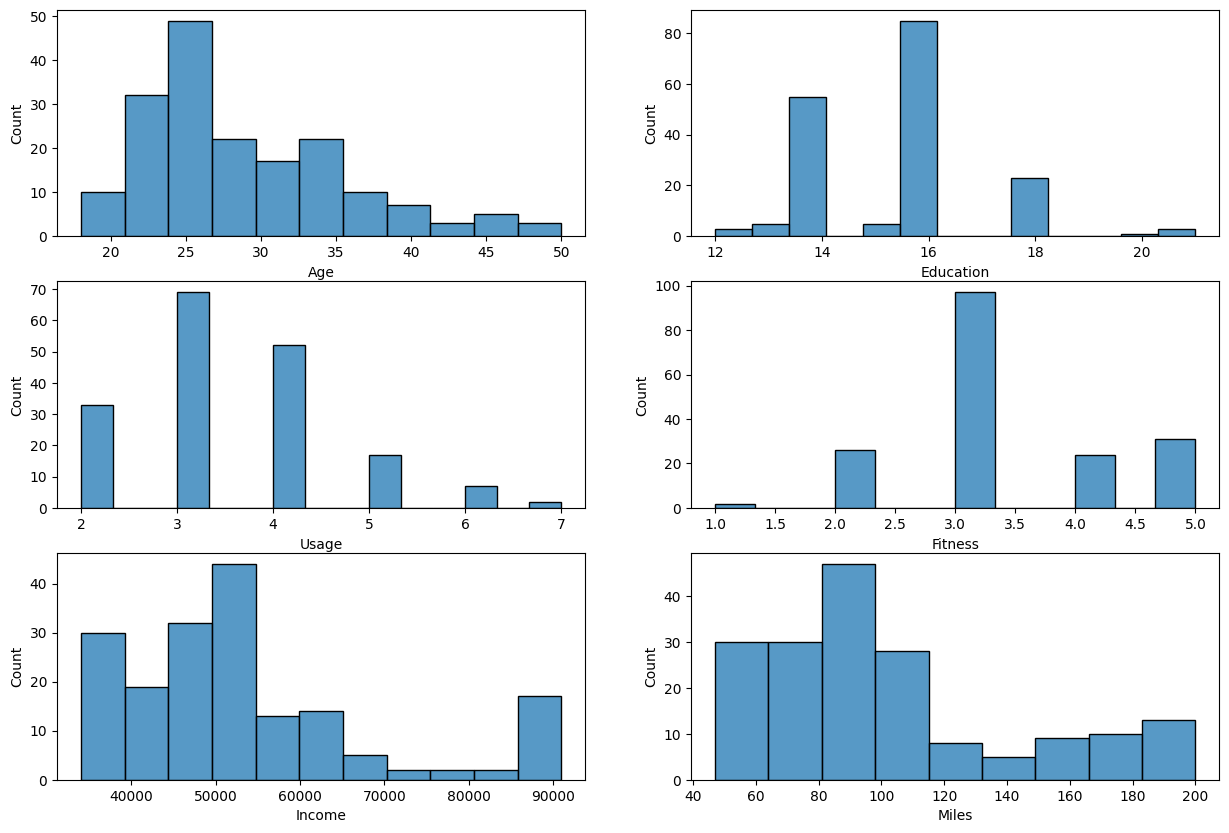

In [ ]:
# Let's Plot the Histogram  for Age ,Education,Usage,Fitness,Income,Miles

fig,ax=plt.subplots(3,2,figsize=(15,10))
sns.histplot(data=df,x='Age',ax=ax[0,0])
sns.histplot(data=df,x='Education',ax=ax[0,1])
sns.histplot(data=df,x='Usage',ax=ax[1,0])
sns.histplot(data=df,x='Fitness',ax=ax[1,1])
sns.histplot(data=df,x='Income',ax=ax[2,0])
sns.histplot(data=df,x='Miles',ax=ax[2,1])
plt.show()


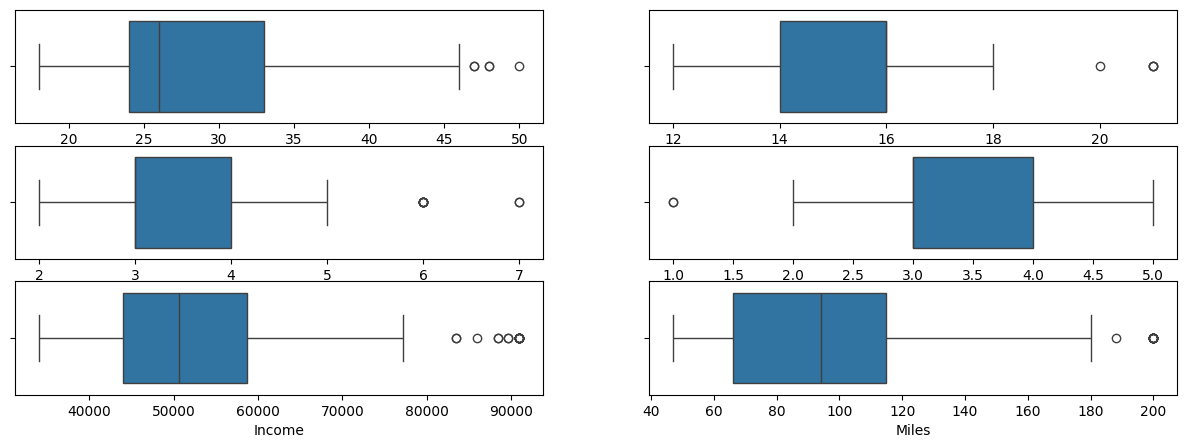

In [ ]:
fig,ax=plt.subplots(3,2,figsize=(15,5))
sns.boxplot(data=df,x='Age',ax=ax[0,0])
sns.boxplot(data=df,x='Education',ax=ax[0,1])
sns.boxplot(data=df,x='Usage',ax=ax[1,0])
sns.boxplot(data=df,x='Fitness',ax=ax[1,1])
sns.boxplot(data=df,x='Income',ax=ax[2,0])
sns.boxplot(data=df,x='Miles',ax=ax[2,1])
plt.show()


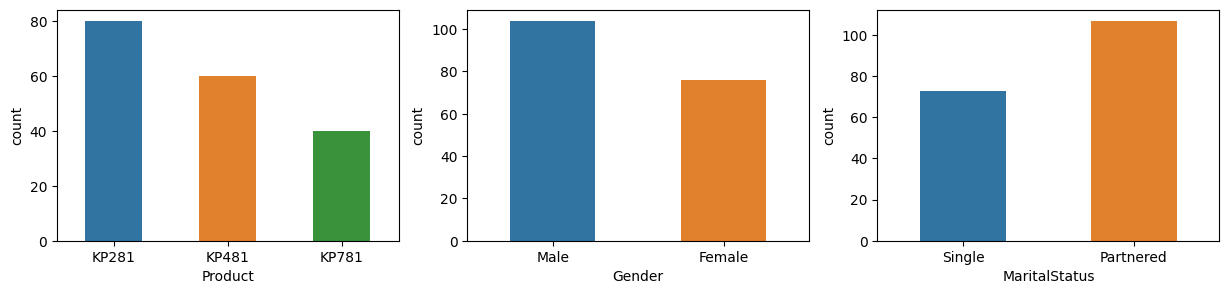

In [ ]:
# Lets Plot for the cateogrical data as well Product,Gender,Maritial Status
fig,ax=plt.subplots(1,3,figsize=(15,3))
sns.countplot(data=df,x='Product',hue='Product',width=0.5,ax=ax[0])
sns.countplot(data=df,x='Gender',hue='Gender',width=0.5,ax=ax[1])
sns.countplot(data=df,x='MaritalStatus',hue='MaritalStatus',width=0.5,ax=ax[2])
plt.show()

# Bivariate Analysis

Let's Perform Bivarite analysis to study relationship between diffrent type of variable

*   Numerical vs Numerical - We can use lineplot or scatter plot
*   Categorical vs Numerical - we can use boxplot or barplot
*   Categorical vs Categorical - we can use Dodged barplot or stacked barplot




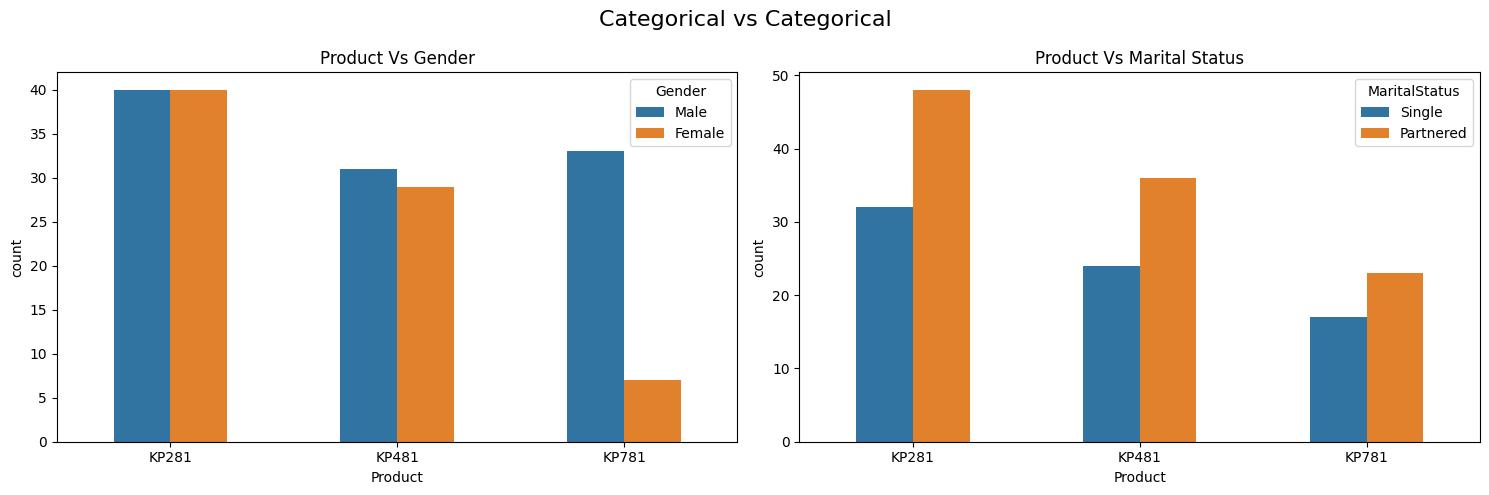

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(15,5))

sns.countplot(data=df,x='Product',hue='Gender',width=0.5,ax=ax[0])
sns.countplot(data=df,x='Product',hue='MaritalStatus',width=0.5,ax=ax[1])
ax[0].set_title('Product Vs Gender')
ax[1].set_title('Product Vs Marital Status')
plt.suptitle('Categorical vs Categorical', fontsize=16)
plt.tight_layout()
plt.show()



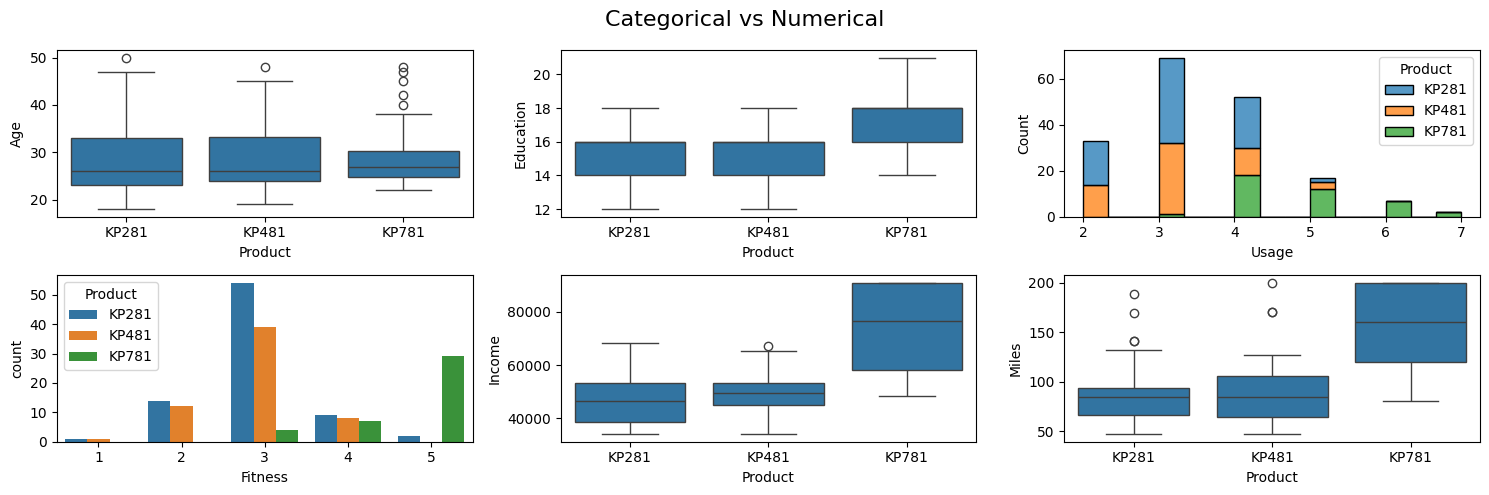

In [ ]:
fig,ax=plt.subplots(2,3,figsize=(15,5))
sns.boxplot(data=df,x='Product',y='Age',ax=ax[0,0])
sns.boxplot(data=df,x='Product',y='Education',ax=ax[0,1])
sns.histplot(data=df,x='Usage',hue='Product',multiple='stack',ax=ax[0,2])
sns.countplot(data=df,hue='Product',x='Fitness',ax=ax[1,0])
sns.boxplot(data=df,x='Product',y='Income',ax=ax[1,1])
sns.boxplot(data=df,x='Product',y='Miles',ax=ax[1,2])
plt.suptitle('Categorical(Product) vs Numerical', fontsize=16)
plt.tight_layout()
plt.show()

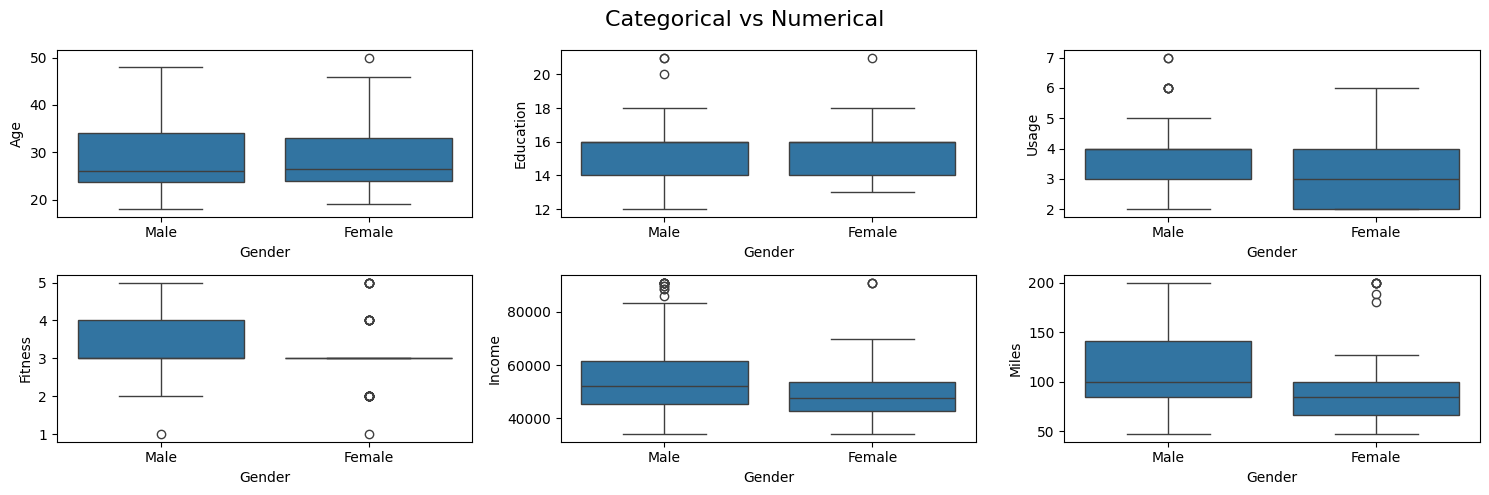

In [ ]:
fig,ax=plt.subplots(2,3,figsize=(15,5))
sns.boxplot(data=df,x='Gender',y='Age',ax=ax[0,0])
sns.boxplot(data=df,x='Gender',y='Education',ax=ax[0,1])
sns.boxplot(data=df,x='Gender',y='Usage',ax=ax[0,2])
sns.boxplot(data=df,x='Gender',y='Fitness',ax=ax[1,0])
sns.boxplot(data=df,x='Gender',y='Income',ax=ax[1,1])
sns.boxplot(data=df,x='Gender',y='Miles',ax=ax[1,2])
plt.suptitle('Categorical vs Numerical', fontsize=16)
plt.tight_layout()
plt.show()

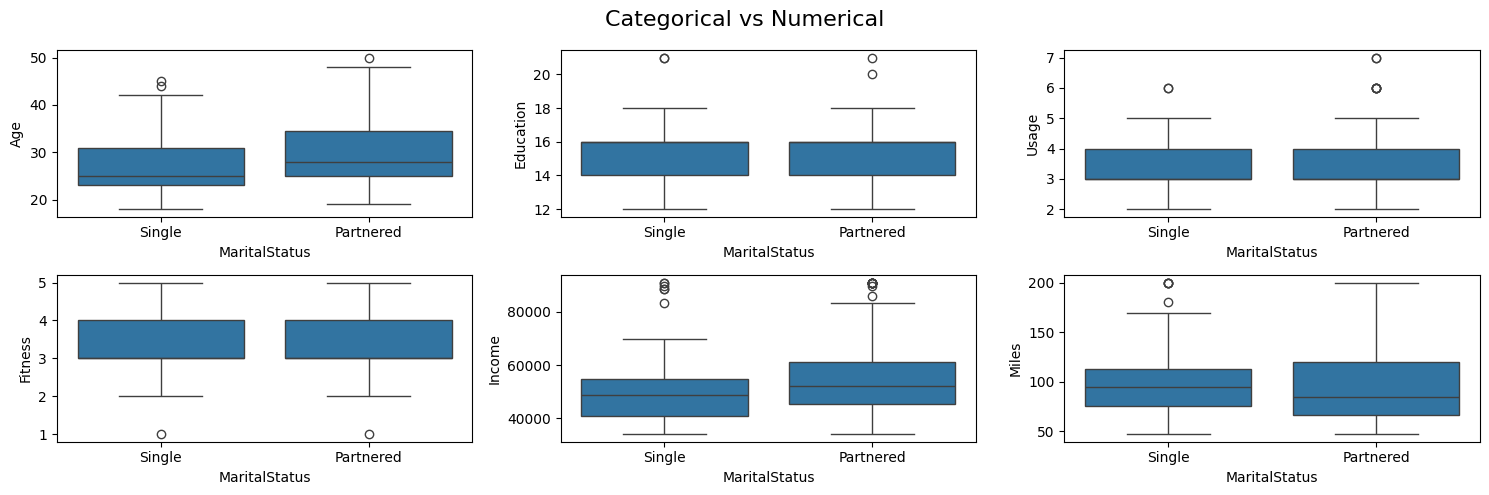

In [ ]:
fig,ax=plt.subplots(2,3,figsize=(15,5))
sns.boxplot(data=df,x='MaritalStatus',y='Age',ax=ax[0,0])
sns.boxplot(data=df,x='MaritalStatus',y='Education',ax=ax[0,1])
sns.boxplot(data=df,x='MaritalStatus',y='Usage',ax=ax[0,2])
sns.boxplot(data=df,x='MaritalStatus',y='Fitness',ax=ax[1,0])
sns.boxplot(data=df,x='MaritalStatus',y='Income',ax=ax[1,1])
sns.boxplot(data=df,x='MaritalStatus',y='Miles',ax=ax[1,2])
plt.suptitle('Categorical vs Numerical', fontsize=16)
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

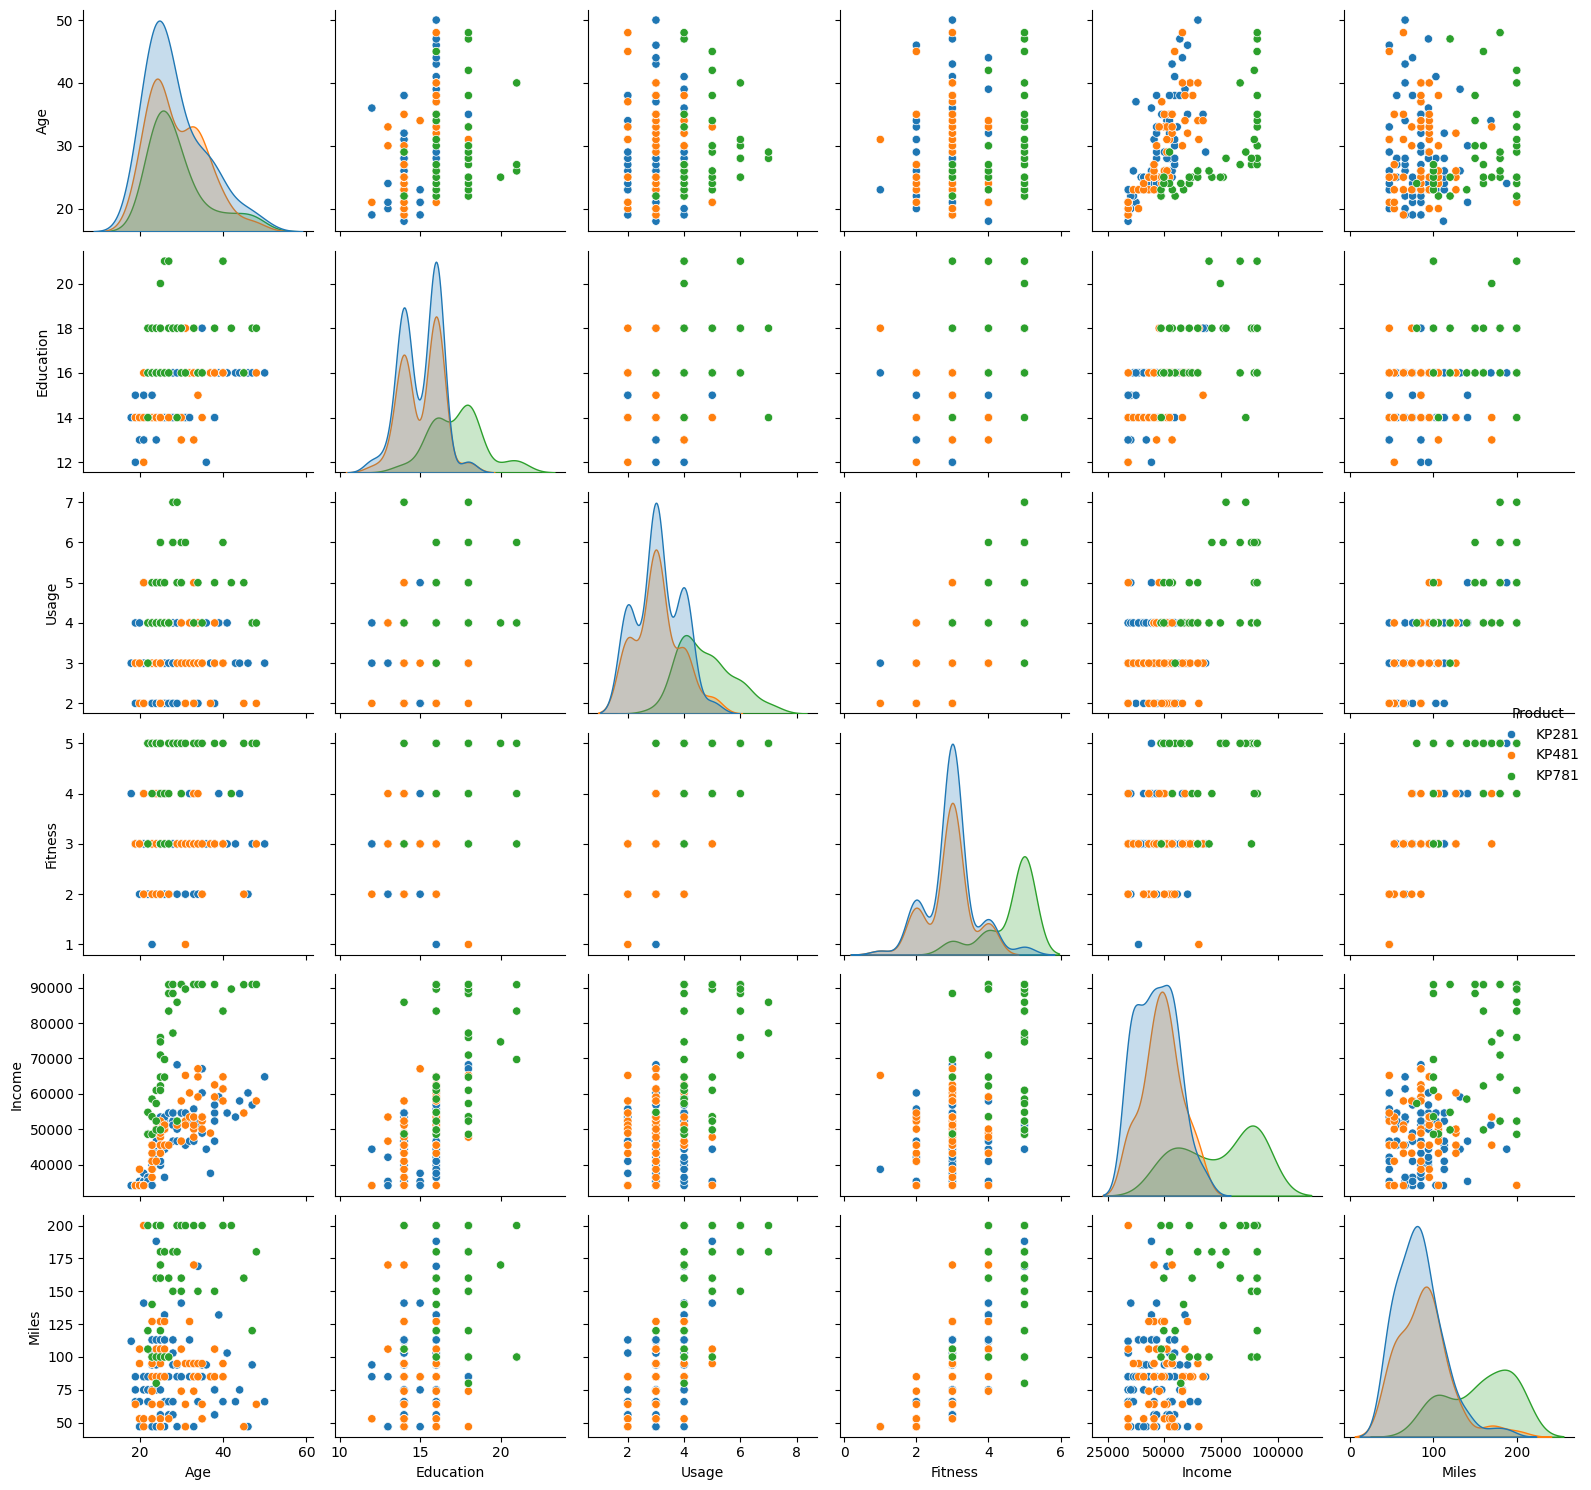

In [ ]:
plt.figure()
sns.pairplot(df,hue='Product')
plt.tight_layout()
plt.show()

## Multivariate Analysis

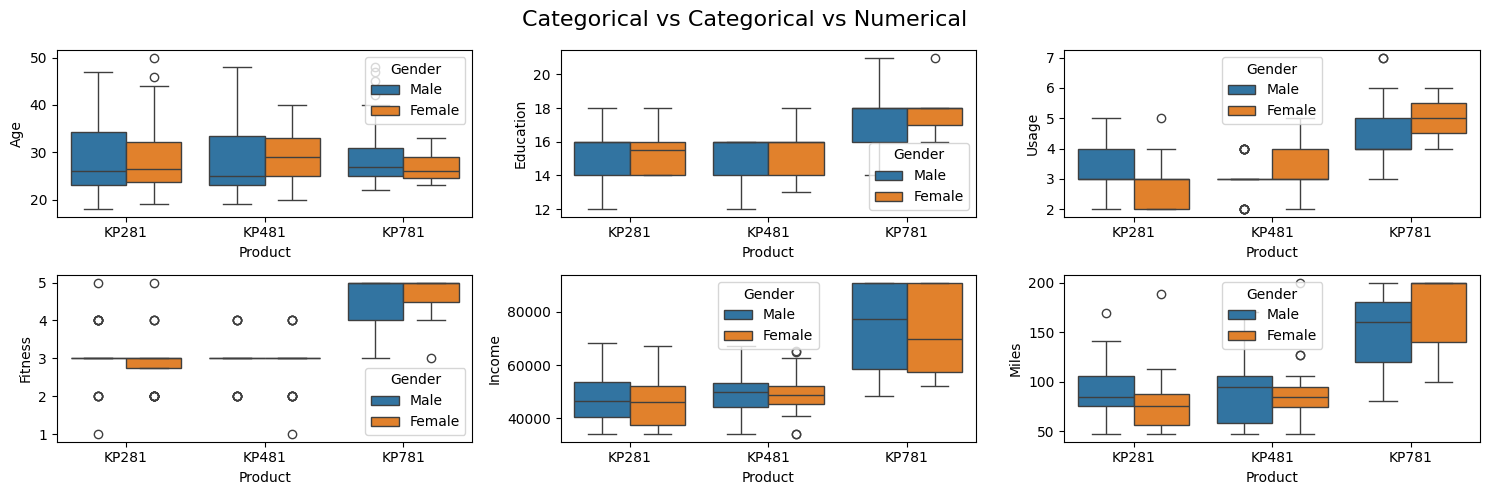

In [ ]:
fig,ax=plt.subplots(2,3,figsize=(15,5))
sns.boxplot(data=df,x='Product',y='Age',hue='Gender',ax=ax[0,0])
sns.boxplot(data=df,x='Product',y='Education',hue='Gender',ax=ax[0,1])
sns.boxplot(data=df,x='Product',y='Usage',hue='Gender',ax=ax[0,2])
sns.boxplot(data=df,x='Product',y='Fitness',hue='Gender',ax=ax[1,0])
sns.boxplot(data=df,x='Product',y='Income',hue='Gender',ax=ax[1,1])
sns.boxplot(data=df,x='Product',y='Miles',hue='Gender',ax=ax[1,2])
plt.suptitle('Categorical vs Categorical vs Numerical', fontsize=16)
plt.tight_layout()
plt.show()

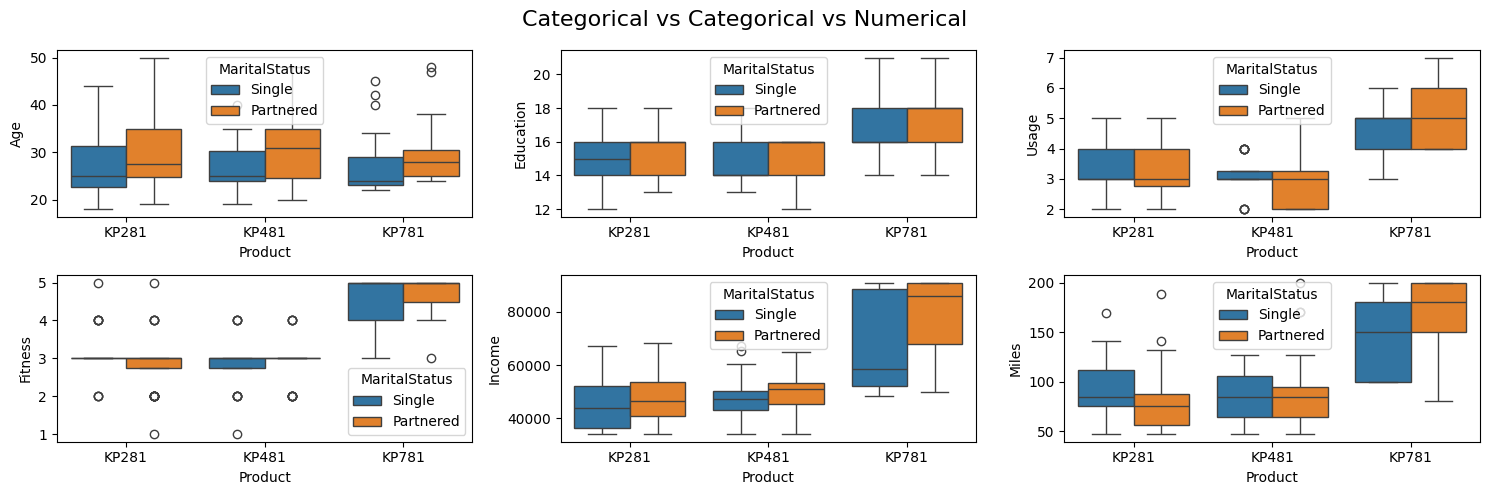

In [ ]:
fig,ax=plt.subplots(2,3,figsize=(15,5))
sns.boxplot(data=df,x='Product',y='Age',hue='MaritalStatus',ax=ax[0,0])
sns.boxplot(data=df,x='Product',y='Education',hue='MaritalStatus',ax=ax[0,1])
sns.boxplot(data=df,x='Product',y='Usage',hue='MaritalStatus',ax=ax[0,2])
sns.boxplot(data=df,x='Product',y='Fitness',hue='MaritalStatus',ax=ax[1,0])
sns.boxplot(data=df,x='Product',y='Income',hue='MaritalStatus',ax=ax[1,1])
sns.boxplot(data=df,x='Product',y='Miles',hue='MaritalStatus',ax=ax[1,2])
plt.suptitle('Categorical vs Categorical vs Numerical', fontsize=16)
plt.tight_layout()
plt.show()

## Contigency Table

In [ ]:
product_gender=pd.crosstab(df['Product'],df['Gender'],margins=True)
product_gender

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [ ]:
# marginal probablity of the product

kp281=product_gender.loc['KP281','All']/product_gender.loc['All','All']
kp481=product_gender.loc['KP481','All']/product_gender.loc['All','All']
kp781=product_gender.loc['KP781','All']/product_gender.loc['All','All']
print(f'Marginal probablity of KP281 is {kp281}')
print(f'Marginal probablity of KP481 is {kp481}')
print(f'Marginal probablity of KP781 is {kp781}')

Marginal probablity of KP281 is 0.4444444444444444
Marginal probablity of KP481 is 0.3333333333333333
Marginal probablity of KP781 is 0.2222222222222222


In [ ]:
# computing marginal probabilty for gender
male=product_gender.loc['All','Male']/product_gender.loc['All','All']
female=product_gender.loc['All','Female']/product_gender.loc['All','All']
print(f"Marginal probablity of Male is {male}")
print(f"Marginal probablity of Female is {female}")

Marginal probablity of Male is 0.5777777777777777
Marginal probablity of Female is 0.4222222222222222


In [ ]:
# Condition probability for gender given the probablity for product

# what is the probability that a person purchasing a treadmill is male given that purchased treadmill is kp281
print("KP281")
kp281_male=product_gender.loc['KP281','Male']/product_gender.loc['KP281','All']
print(f"The probability that a person purchasing a treadmill is male given that purchased treadmill is kp281 is {kp281_male}")
kp281_female=product_gender.loc['KP281','Female']/product_gender.loc['KP281','All']
print(f"The probability that a person purchasing a treadmill is female given that purchased treadmill is kp281 is {kp281_female}")

print("KP481")
kp481_male=product_gender.loc['KP481','Male']/product_gender.loc['KP481','All']
print(f"The probability that a person purchasing a treadmill is male given that purchased treadmill is kp481 is {kp481_male}")
kp481_female=product_gender.loc['KP481','Female']/product_gender.loc['KP481','All']
print(f"The probability that a person purchasing a treadmill is female given that purchased treadmill is kp481 is {kp481_female}")

print("KP781")
kp781_male=product_gender.loc['KP781','Male']/product_gender.loc['KP781','All']
print(f"The probability that a person purchasing a treadmill is male given that purchased treadmill is kp781 is {kp781_male}")
kp781_female=product_gender.loc['KP781','Female']/product_gender.loc['KP781','All']
print(f"The probability that a person purchasing a treadmill is female given that purchased treadmill is kp781 is {kp781_female}")

KP281
The probability that a person purchasing a treadmill is male given that purchased treadmill is kp281 is 0.5
The probability that a person purchasing a treadmill is female given that purchased treadmill is kp281 is 0.5
KP481
The probability that a person purchasing a treadmill is male given that purchased treadmill is kp481 is 0.5166666666666667
The probability that a person purchasing a treadmill is female given that purchased treadmill is kp481 is 0.48333333333333334
KP781
The probability that a person purchasing a treadmill is male given that purchased treadmill is kp781 is 0.825
The probability that a person purchasing a treadmill is female given that purchased treadmill is kp781 is 0.175


In [ ]:
product_marital=pd.crosstab(df['Product'],df['MaritalStatus'],margins=True)
product_marital

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


In [ ]:
# Marginal Probability

single=product_marital.loc['All','Single']/product_marital.loc['All','All']
partnered=product_marital.loc['All','Partnered']/product_marital.loc['All','All']
print(f"Marginal probablity of Single is {single}")
print(f"Marginal probablity of Married is {partnered}")


Marginal probablity of Single is 0.40555555555555556
Marginal probablity of Married is 0.5944444444444444


In [ ]:
# Conditional Probability

print("KP281")
kp281_single=product_marital.loc['KP281','Single']/product_marital.loc['KP281','All']
print(f"The probability that a person purchasing a treadmill is single given that purchased treadmill is kp281 is {kp281_single}")
kp281_partnered=product_marital.loc['KP281','Partnered']/product_marital.loc['KP281','All']
print(f"The probability that a person purchasing a treadmill is partnered given that purchased treadmill is kp281 is {kp281_partnered}")

print("KP481")
kp481_single=product_marital.loc['KP481','Single']/product_marital.loc['KP481','All']
print(f"The probability that a person purchasing a treadmill is single given that purchased treadmill is kp481 is {kp481_single}")
kp481_partnered=product_marital.loc['KP481','Partnered']/product_marital.loc['KP481','All']
print(f"The probability that a person purchasing a treadmill is partnered given that purchased treadmill is kp481 is {kp481_partnered}")

print("KP781")
kp781_single=product_marital.loc['KP781','Single']/product_marital.loc['KP781','All']
print(f"The probability that a person purchasing a treadmill is single given that purchased treadmill is kp781 is {kp781_single}")
kp781_partnered=product_marital.loc['KP781','Partnered']/product_marital.loc['KP781','All']
print(f"The probability that a person purchasing a treadmill is partnered given that purchased treadmill is kp781 is {kp781_partnered}")


KP281
The probability that a person purchasing a treadmill is single given that purchased treadmill is kp281 is 0.4
The probability that a person purchasing a treadmill is partnered given that purchased treadmill is kp281 is 0.6
KP481
The probability that a person purchasing a treadmill is single given that purchased treadmill is kp481 is 0.4
The probability that a person purchasing a treadmill is partnered given that purchased treadmill is kp481 is 0.6
KP781
The probability that a person purchasing a treadmill is single given that purchased treadmill is kp781 is 0.425
The probability that a person purchasing a treadmill is partnered given that purchased treadmill is kp781 is 0.575


In [ ]:
# Customer Profiling on the basis of Product

'''

Customer Profiling
KP281
Age Distribution - for between 25-35
Income distribution - for between 40 to 50
gender distribution - for both
marital status distribution - partnered people purchase more as compare to single
usage frequency - for people who will use 2 or 3 times a week
fitness level - for 1 - 3

KP481
Age Distribution - for between 25-35
Income distribution -for between 45-50
gender distribution - for male more likely to buy than female
marital status distribution - partnered people purchase more as compare to single
usage frequency - for people who will use 2 or 3 times a week
fitness level - for 1 to 3

KP781
Age Distribution - for between 25 -30
Income distribution - more than 60 thousand
gender distribution - for males is very high
marital status distribution - partnered people purchase more as compare to single
usage frequency - 4 or more
fitness level - 4 or more

'''

### Insights and Business Impact


Product Positioning:

KP481 is positioned as a mid-range product targeting younger adults with moderate fitness routines.
Treadmill 281 appeals to older, lower-income customers with casual fitness routines.
Treadmill 781 is a premium product for high-income, fitness-committed individuals.

Marketing Strategy:
Treadmill 481 can be marketed to young professionals with average income.
Treadmill 781 should be advertised as a high-end product for serious fitness enthusiasts.
Treadmill 281 is ideal for seniors and casual exercisers, making it a good candidate for targeted advertising to these segments.
